In [160]:
# IPL dataset EDA
#1.how winning toss has impacted each team's decisions and results
#2.How has each team performed over the years
#3.Who are the top performing players of the IPL
# BY Nisant Sharma

In [161]:
# Handling all imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [162]:
#reading deliveries dataset 
deliveries=pd.read_csv("deliveries.csv")
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [163]:
#reading matches dataset
matches=pd.read_csv("matches.csv")
matches.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [164]:
# refactoring our tables
matches = matches.drop(['umpire1','umpire2','umpire3'],axis = 1)
matches.isna().sum()

id                 0
Season             0
city               7
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             4
win_by_runs        0
win_by_wickets     0
player_of_match    4
venue              0
dtype: int64

In [165]:
matches[matches.city.isnull()][['city','venue']]

,city,venue
461,NaN,Dubai International Cricket Stadium
462,NaN,Dubai International Cricket Stadium
466,NaN,Dubai International Cricket Stadium
468,NaN,Dubai International Cricket Stadium
469,NaN,Dubai International Cricket Stadium
474,NaN,Dubai International Cricket Stadium
476,NaN,Dubai International Cricket Stadium


In [166]:
matches.city = matches.city.fillna('Dubai')
matches.isna().sum()

id                 0
Season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             4
win_by_runs        0
win_by_wickets     0
player_of_match    4
venue              0
dtype: int64

In [167]:
matches[matches.winner.isnull()][['winner','player_of_match','result']]

,winner,player_of_match,result
300,NaN,NaN,no result
545,NaN,NaN,no result
570,NaN,NaN,no result
744,NaN,NaN,no result


In [168]:
# Refactoring deliveries dataset
deliveries.isna().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [169]:
merge_df = pd.merge(deliveries,matches, left_on='match_id', right_on ='id')
merge_df.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"


Text(0.5, 1.0, 'Decision taken by captains after winning tosses')

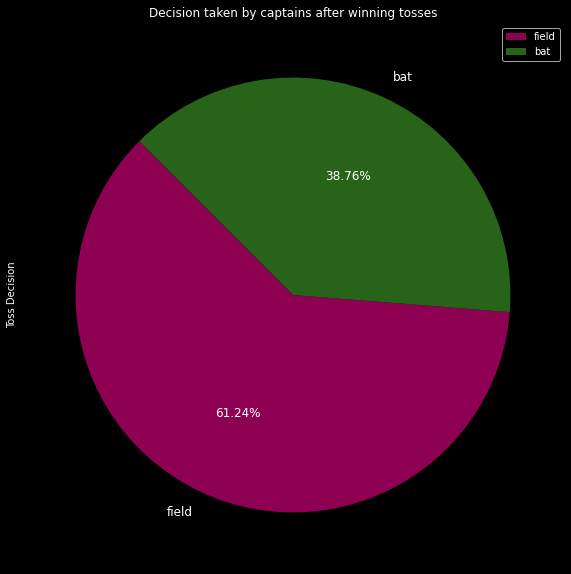

In [170]:
#lets start our EDA
# After winning Toss what is the captains decision
matches['toss_decision'].value_counts().plot(kind='pie', fontsize=12, autopct='%3.2f%%', 
                                               figsize=(10,10), shadow=False, startangle=135, legend=True, cmap='PiYG')
plt.ylabel('Toss Decision')
plt.title('Decision taken by captains after winning tosses')

In [171]:
#Which team won the toss for how many times
toss_win = matches['toss_winner'].value_counts()
toss_win

Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Royal Challengers Bangalore    81
Kings XI Punjab                81
Delhi Daredevils               80
Rajasthan Royals               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

Text(0, 0.5, 'Count')

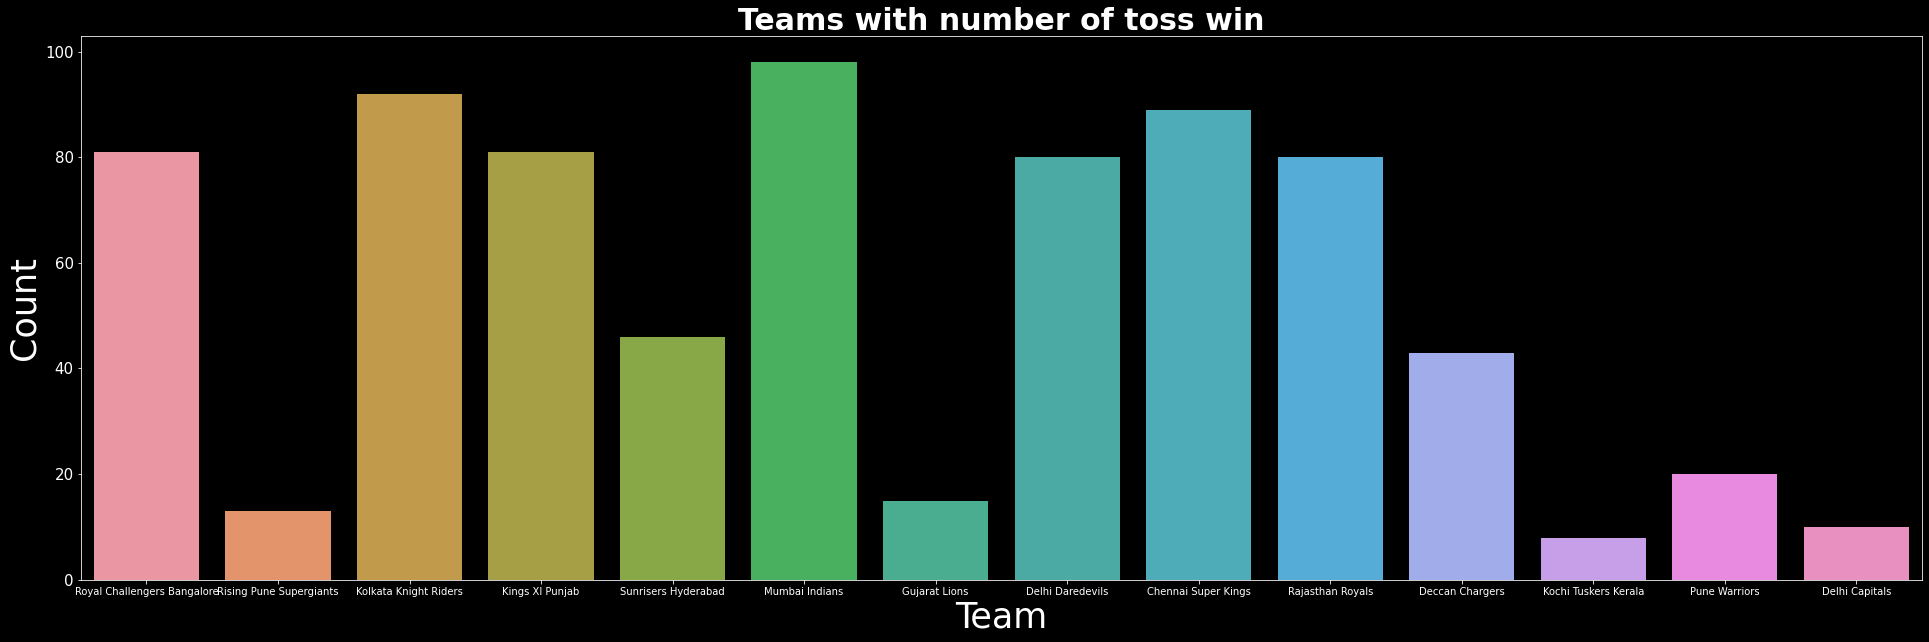

In [172]:
matches['toss_winner'].replace(to_replace='Rising Pune Supergiant', value = 'Rising Pune Supergiants', inplace = True)
plt.figure(figsize = (33,10))
sns.countplot(matches['toss_winner'])
plt.title("Teams with number of toss win", size = 30, fontweight = 'bold')
plt.xticks(size = 10)
plt.yticks(size = 15)
plt.xlabel("Team", size = 35)
plt.ylabel("Count", size = 35)


Text(0, 0.5, 'Count')

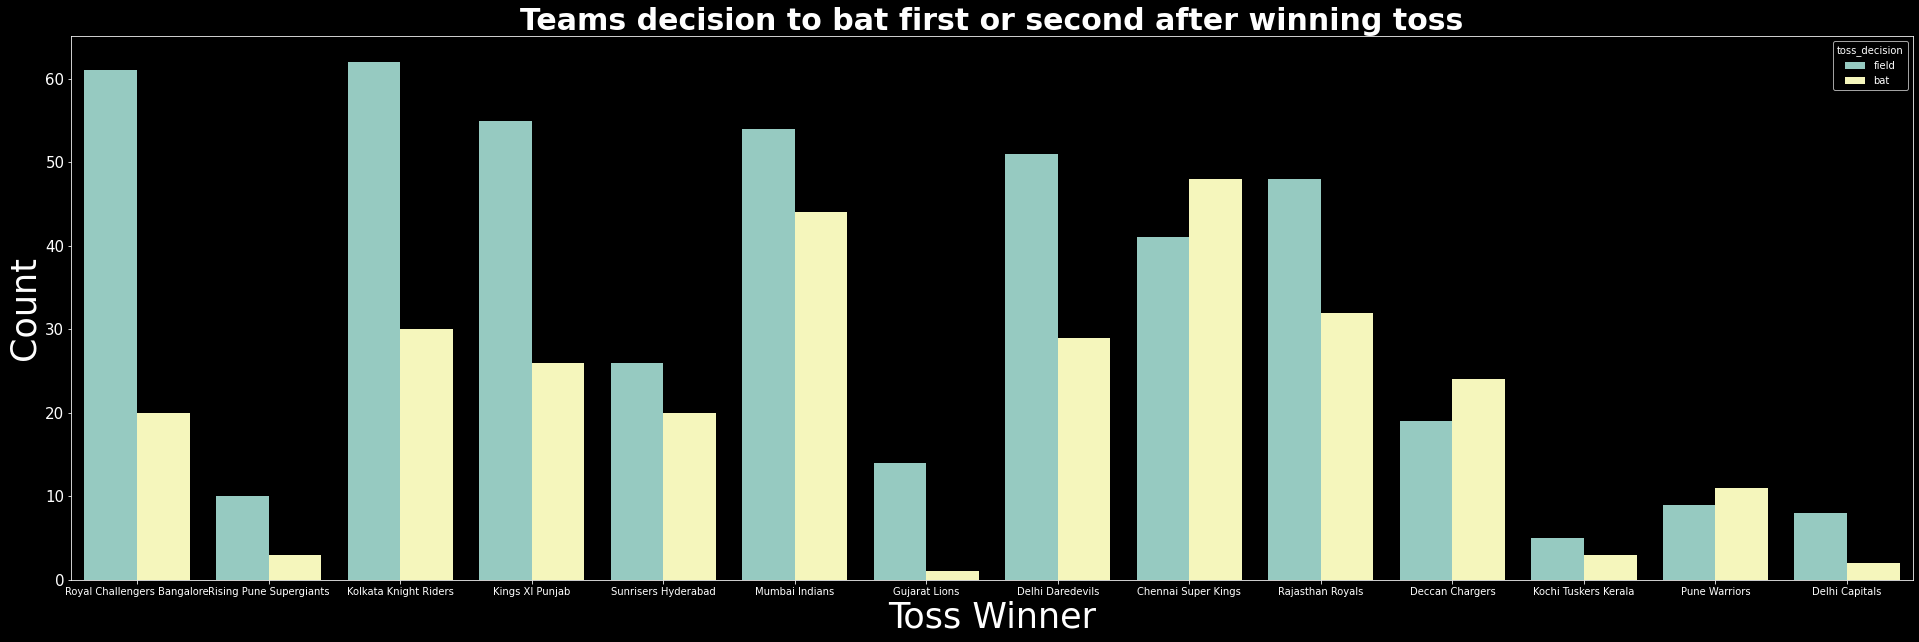

In [173]:
#individual team decision after winning the toss
plt.figure(figsize = (33,10))
sns.countplot('toss_winner', data = matches, hue = 'toss_decision')
plt.title("Teams decision to bat first or second after winning toss", size = 30, fontweight = 'bold')
plt.xticks(size = 10)
plt.yticks(size = 15)
plt.xlabel("Toss Winner", size = 35)
plt.ylabel("Count", size = 35)

Text(0, 0.5, 'Count')

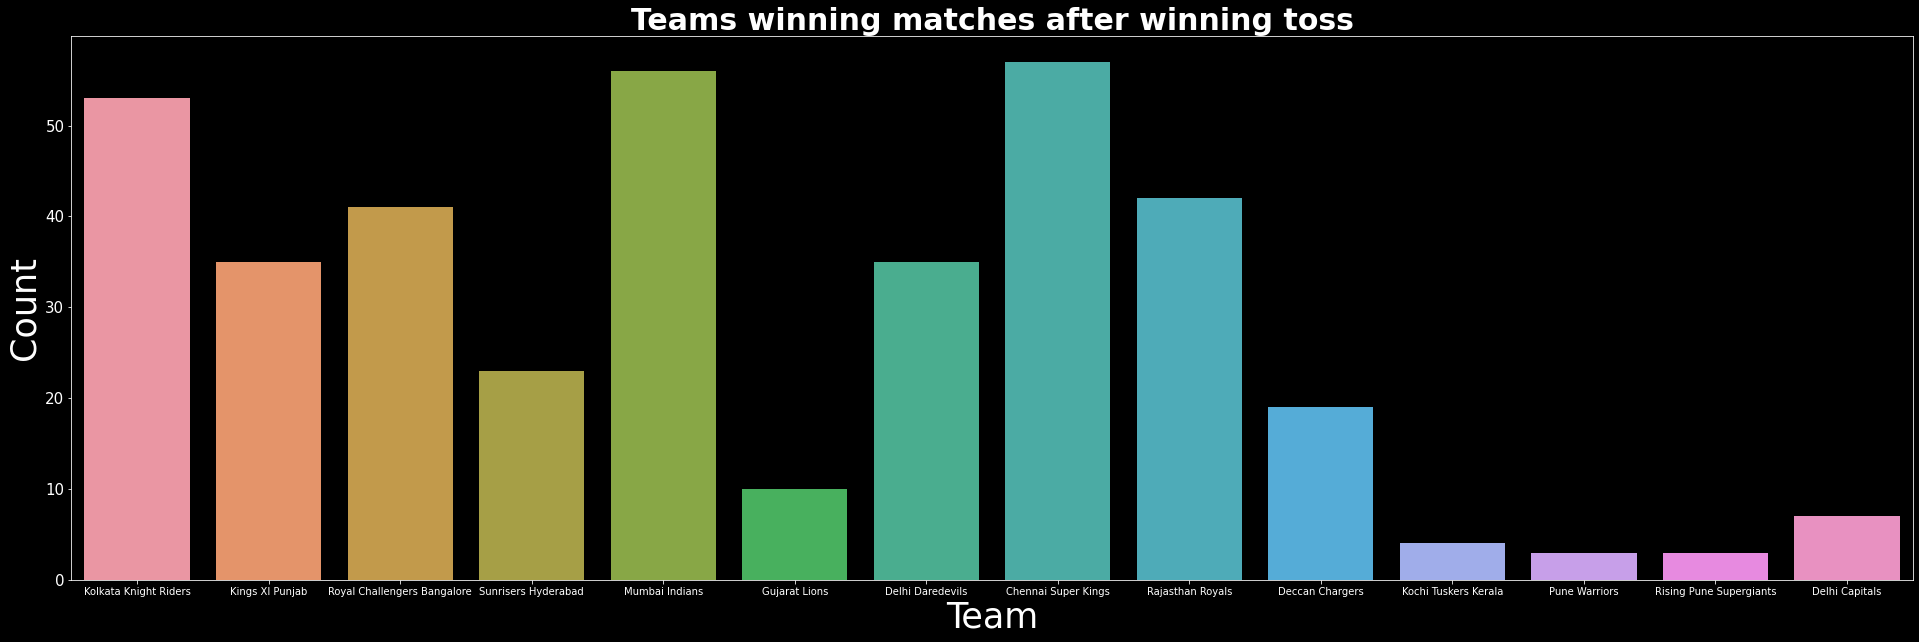

In [174]:
filter1 = matches['winner']==matches['toss_winner']
team=matches.where(filter1)
team.dropna(inplace=True)
"""wintoss = team['toss_winner'].value_counts()
wintoss"""
plt.figure(figsize = (33,10))
sns.countplot(team['toss_winner'])
plt.title("Teams winning matches after winning toss", size = 30, fontweight = 'bold')
plt.xticks(size = 10)
plt.yticks(size = 15)
plt.xlabel("Team", size = 35)
plt.ylabel("Count", size = 35)


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Mumbai Indians'),
  Text(0, 1, 'Chennai Super Kings'),
  Text(0, 2, 'Kolkata Knight Riders'),
  Text(0, 3, 'Rajasthan Royals'),
  Text(0, 4, 'Deccan Chargers'),
  Text(0, 5, 'Sunrisers Hyderabad')])

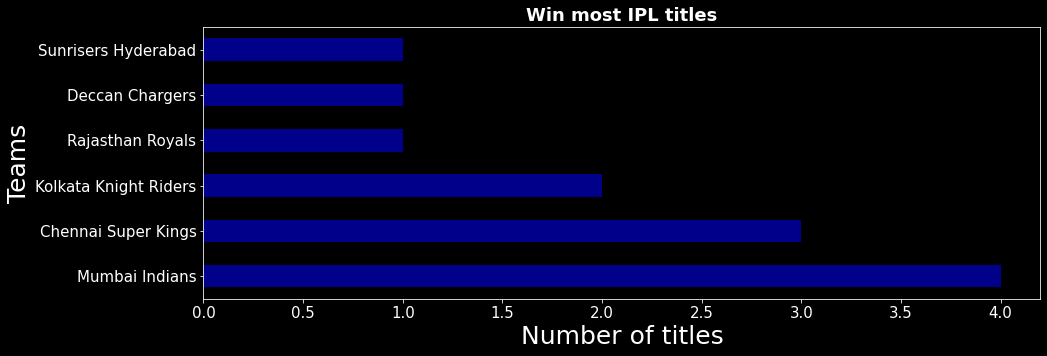

In [175]:
#team with maximum no of titles
winning_teams = matches[['Season','winner']]

#dictionaries to get winners to each season
winners_ipl_team = {}
for i in sorted(winning_teams.Season.unique()):
    winners_ipl_team[i] = winning_teams[winning_teams.Season == i]['winner'].tail(1).values[0]
    
winners_of_IPL = pd.Series(winners_ipl_team)
winners_of_IPL = pd.DataFrame(winners_of_IPL, columns=['team'])


winners_of_IPL['team'].value_counts().plot(kind = 'barh', figsize = (15,5), color = 'darkblue')
plt.title("Win most IPL titles",fontsize=18,fontweight="bold")
plt.ylabel("Teams", size = 25)
plt.xlabel("Number of titles", size = 25)
plt.xticks(size = 15)
plt.yticks(size = 15)

In [176]:
# How many total number of matches each team has won
teams = matches['winner'].value_counts()
teams

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

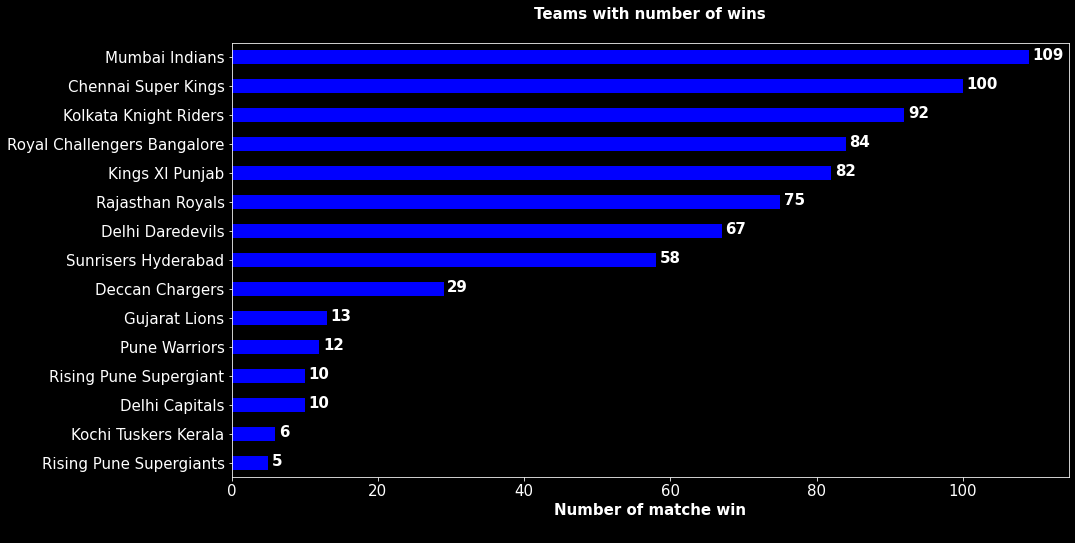

In [177]:
matches['winner'].replace(to_replace='Rising Pune Supergiant', value = 'Rising Pune Supergiants', inplace = True)
teams = teams.plot.barh(figsize=(15,8), color = 'blue', fontsize = 15)

teams.set_title('Teams with number of wins\n', fontsize=15, fontweight='bold')
teams.set_xlabel('Number of matche win\n', fontsize=15, fontweight='bold')

teams.invert_yaxis()

for i in teams.patches:
    teams.text(i.get_width()+0.5, i.get_y()+.35, i.get_width(), fontsize=15, fontweight='bold', color = 'white')



In [178]:
batting_teams_win = matches.winner[matches.win_by_runs!=0].value_counts()
batting_teams_win

Mumbai Indians                 57
Chennai Super Kings            52
Kings XI Punjab                38
Kolkata Knight Riders          36
Royal Challengers Bangalore    35
Sunrisers Hyderabad            30
Rajasthan Royals               27
Delhi Daredevils               25
Deccan Chargers                18
Rising Pune Supergiants         7
Pune Warriors                   6
Delhi Capitals                  3
Kochi Tuskers Kerala            2
Gujarat Lions                   1
Name: winner, dtype: int64

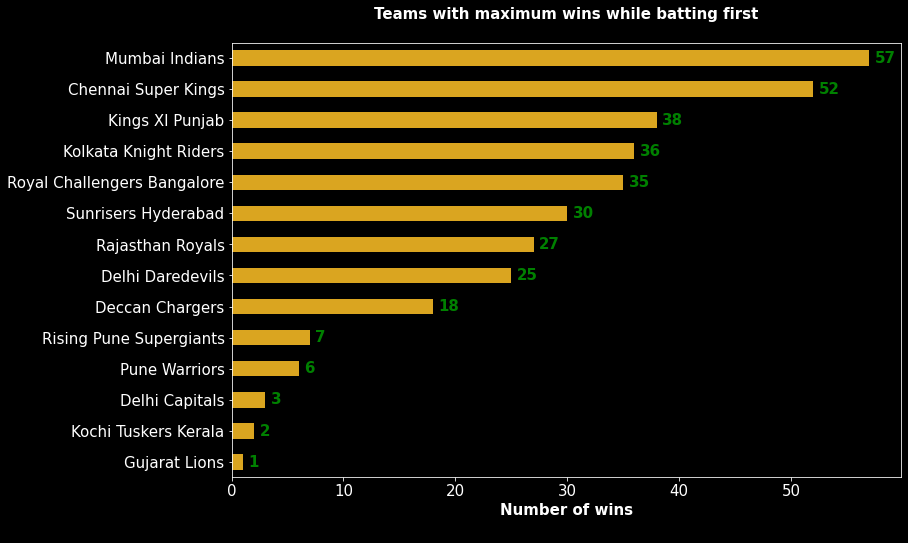

In [179]:
batting_teams_win = batting_teams_win.plot(kind = 'barh', figsize = (12,8), color = 'goldenrod', fontsize = 15)
plt.style.use('dark_background')

batting_teams_win.set_title('Teams with maximum wins while batting first\n', fontsize=15, fontweight='bold')
batting_teams_win.set_xlabel('Number of wins\n', fontsize=15, fontweight='bold')


batting_teams_win.invert_yaxis()

for i in batting_teams_win.patches:
    batting_teams_win.text(i.get_width()+0.5, i.get_y()+.40, i.get_width(), fontsize=15, fontweight='bold', color = 'green')

In [180]:
batting_teams_win_second = matches.winner[matches.win_by_wickets!=0].value_counts()
batting_teams_win_second

Kolkata Knight Riders          56
Mumbai Indians                 50
Royal Challengers Bangalore    48
Chennai Super Kings            48
Rajasthan Royals               46
Kings XI Punjab                42
Delhi Daredevils               42
Sunrisers Hyderabad            27
Gujarat Lions                  12
Deccan Chargers                11
Rising Pune Supergiants         8
Pune Warriors                   6
Delhi Capitals                  6
Kochi Tuskers Kerala            4
Name: winner, dtype: int64

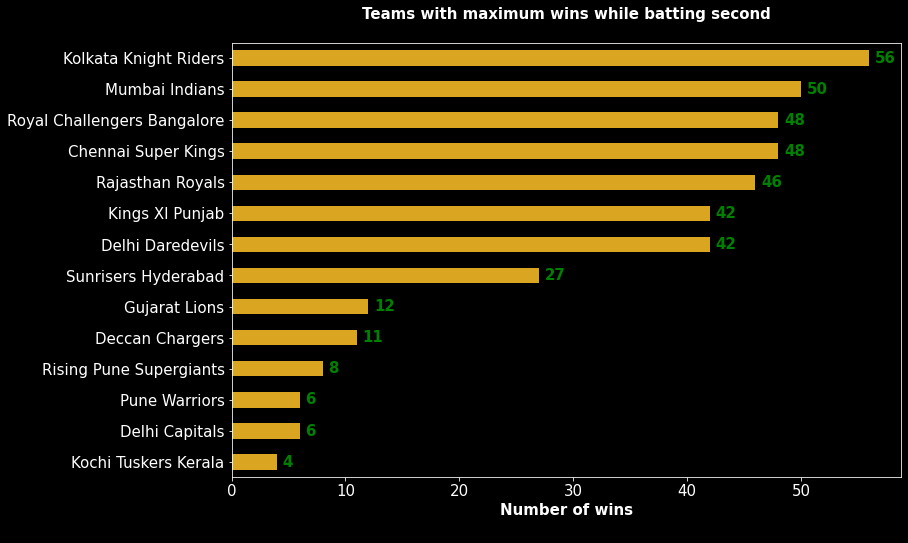

In [181]:
batting_teams_win_second = batting_teams_win_second.plot(kind = 'barh', figsize = (12,8), color = 'goldenrod', fontsize = 15)
plt.style.use('dark_background')

batting_teams_win_second.set_title('Teams with maximum wins while batting second\n', fontsize=15, fontweight='bold')
batting_teams_win_second.set_xlabel('Number of wins\n', fontsize=15, fontweight='bold')


batting_teams_win_second.invert_yaxis()

for i in batting_teams_win_second.patches:
    batting_teams_win_second.text(i.get_width()+0.5, i.get_y()+.40, i.get_width(), fontsize=15, fontweight='bold', color = 'green')

In [182]:
#player performance analysis
mom = matches['player_of_match'].value_counts()[0:10]
mom

CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
MEK Hussey        12
Name: player_of_match, dtype: int64

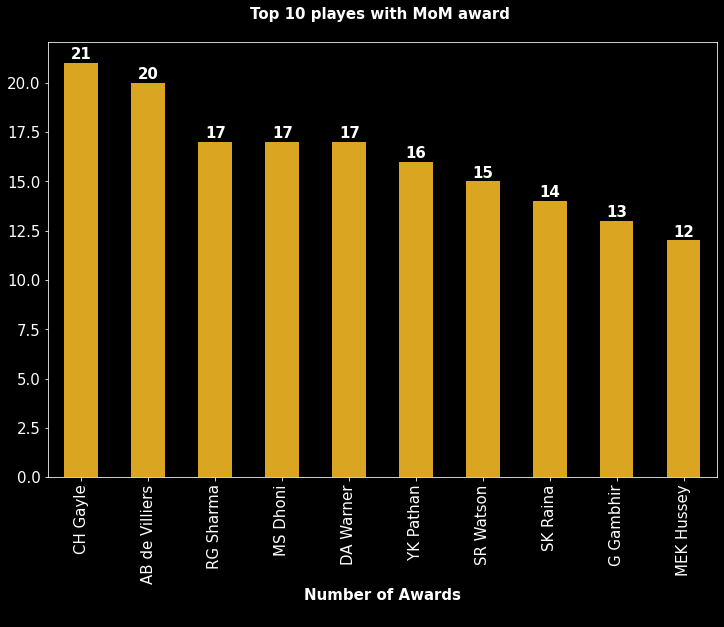

In [183]:
mom = mom.plot(kind = 'bar', figsize = (12,8), color = 'goldenrod', fontsize = 15)
plt.style.use('dark_background')

mom.set_title('Top 10 playes with MoM award \n', fontsize=15, fontweight='bold')
mom.set_xlabel('Number of Awards\n', fontsize=15, fontweight='bold')



for i in mom.patches:
    mom.text(i.get_x()+.10, i.get_height()+.2, i.get_height(), fontsize=15, fontweight='bold', color = 'white')

In [184]:
#players with most runs
top_playes = deliveries.groupby('batsman')['batsman_runs'].sum().sort_values(ascending = False)[0:15]
top_playes

batsman
V Kohli           5434
SK Raina          5415
RG Sharma         4914
DA Warner         4741
S Dhawan          4632
CH Gayle          4560
MS Dhoni          4477
RV Uthappa        4446
AB de Villiers    4428
G Gambhir         4223
AM Rahane         3850
KD Karthik        3688
SR Watson         3614
AT Rayudu         3326
YK Pathan         3241
Name: batsman_runs, dtype: int64

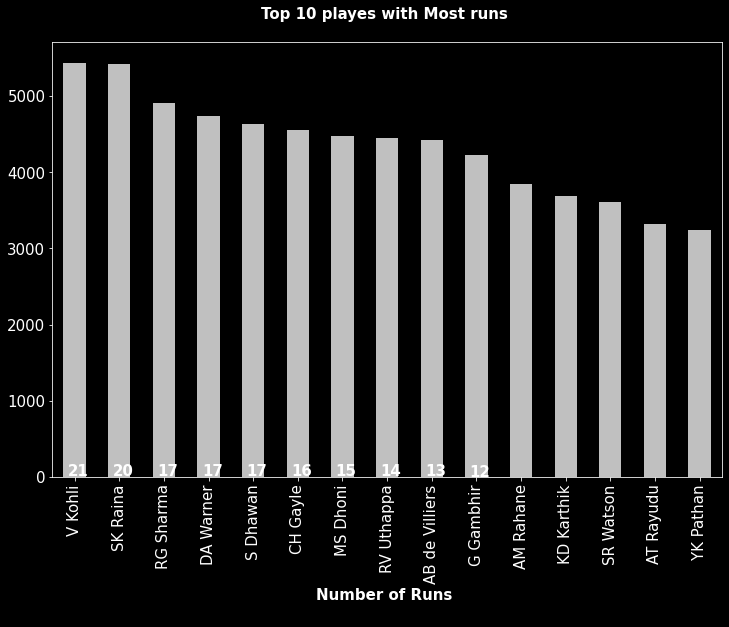

In [185]:
top_players = top_playes.plot(kind = 'bar', figsize = (12,8), color = 'silver', fontsize = 15)
plt.style.use('dark_background')

top_players.set_title('Top 10 playes with Most runs \n', fontsize=15, fontweight='bold')
top_players.set_xlabel('Number of Runs \n', fontsize=15, fontweight='bold')



for i in mom.patches:
    top_players.text(i.get_x()+.10, i.get_height()+.2, i.get_height(), fontsize=15, fontweight='bold', color = 'white')

(array([  0.,  25.,  50.,  75., 100., 125., 150., 175., 200.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

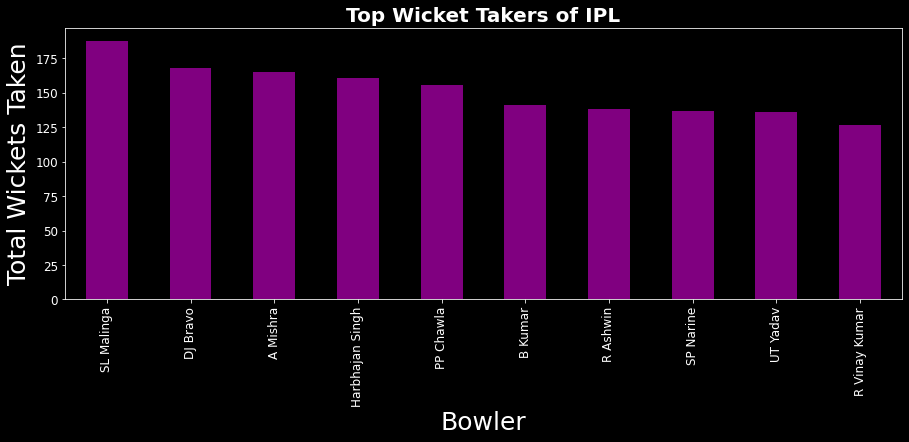

In [186]:
# bowlers with top performances
merge_df.groupby('bowler')['player_dismissed'].count().sort_values(ascending = False).head(10).plot(kind = 'bar', 
                                                color = 'purple', figsize = (15,5))
plt.title("Top Wicket Takers of IPL", fontsize = 20, fontweight = 'bold')
plt.xlabel("Bowler", size = 25)
plt.ylabel("Total Wickets Taken", size = 25)
plt.xticks(size = 12)
plt.yticks(size = 12)